In [1]:
pip install twstock

Note: you may need to restart the kernel to use updated packages.


In [2]:
from twstock import Stock
stock = Stock('2330')
type(stock)

twstock.stock.Stock

In [83]:
data = stock.fetch_from(2018, 1)
print(data)
stock_number = 25932070992
int(data[-1].capacity) / stock_number

[Data(date=datetime.datetime(2018, 1, 2, 0, 0), capacity=18055269, turnover=4188555408, open=231.5, high=232.5, low=231.0, close=232.5, change=3.0, transaction=9954), Data(date=datetime.datetime(2018, 1, 3, 0, 0), capacity=31706091, turnover=7504382512, open=236.0, high=238.0, low=235.5, close=237.0, change=4.5, transaction=13633), Data(date=datetime.datetime(2018, 1, 4, 0, 0), capacity=29179613, turnover=6963192636, open=240.0, high=240.0, low=236.5, close=239.5, change=2.5, transaction=10953), Data(date=datetime.datetime(2018, 1, 5, 0, 0), capacity=23721255, turnover=5681934695, open=240.0, high=240.0, low=238.0, close=240.0, change=0.5, transaction=8659), Data(date=datetime.datetime(2018, 1, 8, 0, 0), capacity=21846692, turnover=5281823362, open=242.0, high=242.5, low=240.5, close=242.0, change=2.0, transaction=10251), Data(date=datetime.datetime(2018, 1, 9, 0, 0), capacity=19043123, turnover=4588314012, open=242.0, high=242.0, low=239.5, close=242.0, change=0.0, transaction=7124), 

0.003433773261976268

In [6]:
clear_list = [(i.open /1000, i.high/1000, i.low/1000, i.close/1000, i.capacity/stock_number) for i in data]

In [10]:
target_list = [i[3] for i in clear_list]

In [61]:
import tensorflow as tf
import numpy as np
import random

class Neuron:
    random.seed(42)
    def __init__(self, samples:tf.constant, targets:tf.constant, epoches:int):
        self.samples = samples
        self.targets = targets
        self.weights = tf.Variable([random.random() for _ in range(self.samples.shape[1])], dtype=tf.float32)
        self.epoches = epoches
        self.learning_rate = 0.0001
        self.convergence = 0.001
    
    def train(self):
        for current_epoch in range(self.epoches):
            error_value = 0.0
            with tf.GradientTape() as tape:
                predictions = tf.reduce_sum(self.samples * self.weights, axis=1)
                loss = tf.reduce_mean(0.5 * tf.square(self.targets - predictions))
                error_value = loss.numpy()
            
            gradients = tape.gradient(loss, [self.weights])
            self.weights.assign_sub(self.learning_rate * gradients[0])
            if error_value <= self.convergence:
                break

    def predict(self, samples):
        samples_tensor = tf.constant(samples, dtype=tf.float32)
        predictions = tf.reduce_sum(samples_tensor * self.weights, axis=1)
        for sample, prediction in zip(samples, predictions.numpy()):
            print(f"Sample: {sample}, Prediction: {prediction}")
            yield prediction



In [21]:
clear_list[-2]

(0.988, 0.995, 0.97, 0.97, 0.004262734898192354)

In [27]:
train_samples = tf.constant(clear_list[:-30], dtype=tf.float32)
valid_samples = tf.constant(clear_list[-30:-1], dtype=tf.float32)
print(len(train_samples), len(valid_samples))
print(train_samples[-1],"\n",valid_samples[-1])

1566 29
tf.Tensor([0.885     0.888     0.879     0.879     0.0017156], shape=(5,), dtype=float32) 
 tf.Tensor([0.988      0.995      0.97       0.97       0.00426273], shape=(5,), dtype=float32)


In [29]:
train_targets = tf.constant(target_list[1:-29], dtype=tf.float32)
valid_tragets = tf.constant(target_list[-29:], dtype=tf.float32)
print(len(train_targets), len(valid_tragets))
print(train_targets[-1],"\n",valid_tragets[-1])

1566 29
tf.Tensor(0.883, shape=(), dtype=float32) 
 tf.Tensor(0.939, shape=(), dtype=float32)


In [66]:
nn = Neuron(samples=train_samples, targets=train_targets, epoches=100)
nn.train()
predictions = nn.predict(valid_samples)

Sample: [0.892      0.895      0.883      0.883      0.00221485], Prediction: 0.8477660417556763
Sample: [0.888      0.914      0.888      0.909      0.00200042], Prediction: 0.8616563677787781
Sample: [0.923      0.935      0.911      0.919      0.00230048], Prediction: 0.8827149271965027
Sample: [0.916      0.922      0.905      0.922      0.00166934], Prediction: 0.8746419548988342
Sample: [0.913      0.925      0.913      0.921      0.00111046], Prediction: 0.8751524090766907
Sample: [0.944      0.95       0.94       0.943      0.00157606], Prediction: 0.8999576568603516
Sample: [0.953      0.984      0.953      0.981      0.00295712], Prediction: 0.9279058575630188
Sample: [0.971      0.981      0.971      0.981      0.00201083], Prediction: 0.930188000202179
Sample: [0.961      0.978      0.96       0.97       0.00377894], Prediction: 0.9251554608345032
Sample: [0.958      0.96       0.94       0.94       0.00285676], Prediction: 0.9083079099655151
Sample: [0.925      0.945      

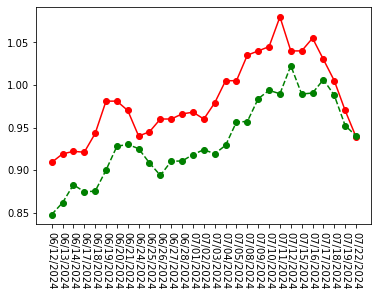

In [67]:
import matplotlib.pyplot as plt
x = [i.date.strftime("%m/%d/%Y") for i in data[-29:]]
plt.xticks(rotation=-90) 
y = target_list[-29:]
plt.plot(x, y, 'ro-', x, list(predictions), 'go--') 
plt.show()

In [73]:
tsmc = tf.constant([[0.963, 0.979, 0.956, 0.979, 46899000/stock_number]], dtype=tf.float32)
prediction = nn.predict(tsmc)
list(prediction)

Sample: [0.963      0.979      0.956      0.979      0.00180853], Prediction: 0.9265009760856628


[0.926501]

In [88]:
from twstock import Stock
import tensorflow as tf
import numpy as np
import random
# stock = Stock('6235')
stock = Stock('2330')
data = stock.fetch_from(2018, 1)
stock_number = 25932070992
# stock_number = 193502596
clear_list = [(i.open /1000, i.high/1000, i.low/1000, i.close/1000, i.capacity/stock_number) for i in data]
target_list = [i[3] for i in clear_list]

In [89]:
class Neuron:
    random.seed(42)

    def __init__(self, samples: tf.constant, targets: tf.constant):
        self.samples = samples
        self.targets = targets
        self.weights = tf.Variable([random.random() for _ in range(self.samples.shape[1])], dtype=tf.float32)
        self.learning_rate = 0.0001
        self.convergence = 0.001

    def train(self):
        while True:
            error_value = 0.0
            with tf.GradientTape() as tape:
                predictions = tf.reduce_sum(self.samples * self.weights, axis=1)
                loss = tf.reduce_mean(0.5 * tf.square((self.targets - predictions)))
                error_value = loss.numpy()

            gradients = tape.gradient(loss, [self.weights])
            self.weights.assign_sub(self.learning_rate * gradients[0])
            print("error_value:", error_value)

            if error_value <= self.convergence:
                tf.saved_model.save(self.weights, 'weights') 
                break

    def predict(self, samples, weight_path=None):
        weight = tf.saved_model.load(weight_path) if weight_path != None else self.weights
        samples_tensor = tf.constant(samples, dtype=tf.float32)   
        predictions = tf.reduce_sum(samples_tensor * weight, axis=1)
        for sample, prediction in zip(samples, predictions.numpy()):
            print(f"Sample: {sample}, Prediction: {prediction}")
            yield prediction

train_samples = tf.constant(clear_list[:-30], dtype=tf.float32)
valid_samples = tf.constant(clear_list[-30:-1], dtype=tf.float32)
print(len(train_samples), len(valid_samples))
print(train_samples[-1],"\n",valid_samples[-1])
train_targets = tf.constant(target_list[1:-29], dtype=tf.float32)
valid_tragets = tf.constant(target_list[-29:], dtype=tf.float32)
print(len(train_targets), len(valid_tragets))
print(train_targets[-1],"\n",valid_tragets[-1])


1574 29
tf.Tensor([0.971      0.981      0.971      0.981      0.00201083], shape=(5,), dtype=float32) 
 tf.Tensor([0.918      0.928      0.903      0.903      0.00343377], shape=(5,), dtype=float32)
1574 29
tf.Tensor(0.97, shape=(), dtype=float32) 
 tf.Tensor(0.815, shape=(), dtype=float32)


In [93]:
nn = Neuron(samples=train_samples, targets=train_targets)
nn.train()
predictions = nn.predict(valid_samples)

error_value: 0.00027919273
INFO:tensorflow:Assets written to: weights\assets


Sample: [0.961      0.978      0.96       0.97       0.00377894], Prediction: 0.9251555800437927
Sample: [0.958      0.96       0.94       0.94       0.00285676], Prediction: 0.9083080887794495
Sample: [0.925      0.945      0.923      0.945      0.00239394], Prediction: 0.8937549591064453
Sample: [0.951      0.96       0.951      0.96       0.00188265], Prediction: 0.9104131460189819
Sample: [0.951     0.961     0.949     0.96      0.0015917], Prediction: 0.9106764197349548
Sample: [0.956      0.971      0.955      0.966      0.00165813], Prediction: 0.9182185530662537
Sample: [9.6799999e-01 9.7700000e-01 9.6499997e-01 9.6799999e-01 8.0734026e-04], Prediction: 0.9239845275878906
Sample: [0.967      0.971      0.959      0.96       0.00107947], Prediction: 0.9191606640815735
Sample: [9.7600001e-01 9.7899997e-01 9.6700001e-01 9.7899997e-01 9.6492603e-04], Prediction: 0.9290870428085327
Sample: [1.         1.01       0.997      1.005      0.00182213], Prediction: 0.9565234184265137
Sampl

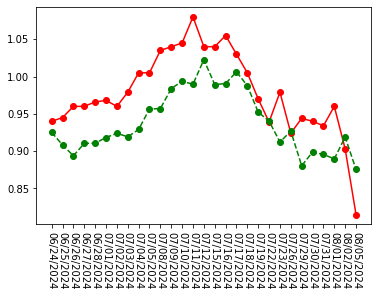

In [94]:
import matplotlib.pyplot as plt
x = [i.date.strftime("%m/%d/%Y") for i in data[-29:]]
plt.xticks(rotation=-90) 
y = target_list[-29:]
plt.plot(x, y, 'ro-', x, list(predictions), 'go--') 
plt.show()

In [95]:
clear_list[-1]

(0.852, 0.857, 0.813, 0.815, 0.006156962745060188)

In [97]:
waffer = tf.constant([clear_list[-1]], dtype=tf.float32)
prediction = nn.predict(waffer)
list(prediction)[0]*1000

Sample: [0.852      0.857      0.813      0.815      0.00615696], Prediction: 0.8070003390312195


807.0003390312195

In [10]:
test = tf.constant(clear_list, dtype=tf.float32)
test_prediction = nn.predict(test)
tests = list(test_prediction)

Sample: [0.2315     0.2325     0.231      0.2325     0.00069625], Prediction: 0.2536029815673828
Sample: [0.236      0.238      0.2355     0.237      0.00122266], Prediction: 0.25891610980033875
Sample: [0.24       0.24       0.2365     0.2395     0.00112523], Prediction: 0.26211926341056824
Sample: [0.24       0.24       0.238      0.24       0.00091475], Prediction: 0.26245370507240295
Sample: [0.242      0.2425     0.2405     0.242      0.00084246], Prediction: 0.2647188603878021
Sample: [0.242      0.242      0.2395     0.242      0.00073435], Prediction: 0.26437780261039734
Sample: [0.2415     0.242      0.236      0.2365     0.00099168], Prediction: 0.262222558259964
Sample: [0.235      0.236      0.2325     0.235      0.00123671], Prediction: 0.25710490345954895
Sample: [0.2345     0.238      0.2335     0.237      0.00089238], Prediction: 0.2572244703769684
Sample: [0.24       0.24       0.238      0.24       0.00110198], Prediction: 0.2625916004180908
Sample: [0.24       0.2405

Sample: [0.2425     0.244      0.2405     0.244      0.00193715], Prediction: 0.26625874638557434
Sample: [0.242      0.2455     0.241      0.245      0.00153159], Prediction: 0.2659948468208313
Sample: [0.248      0.2485     0.246      0.2485     0.00239612], Prediction: 0.2723945081233978
Sample: [0.241      0.242      0.24       0.241      0.00167594], Prediction: 0.2643723487854004
Sample: [0.241      0.2415     0.237      0.2385     0.00114666], Prediction: 0.2626912593841553
Sample: [0.235      0.2365     0.234      0.2345     0.00110944], Prediction: 0.2572985887527466
Sample: [0.236      0.2415     0.236      0.2405     0.00161992], Prediction: 0.26008376479148865
Sample: [0.2415     0.2415     0.238      0.239      0.00108303], Prediction: 0.26331600546836853
Sample: [0.2455     0.25       0.245      0.2485     0.00255941], Prediction: 0.27071326971054077
Sample: [0.2495     0.25       0.2475     0.249      0.00103471], Prediction: 0.2728254199028015
Sample: [0.244      0.245 

Sample: [0.515      0.515      0.508      0.508      0.00151495], Prediction: 0.5607137084007263
Sample: [0.508      0.512      0.507      0.51       0.00156661], Prediction: 0.5565294027328491
Sample: [0.512      0.517      0.508      0.516      0.00135559], Prediction: 0.5603914260864258
Sample: [0.512      0.516      0.509      0.509      0.00098844], Prediction: 0.5589309334754944
Sample: [0.508      0.511      0.506      0.509      0.00070649], Prediction: 0.5554250478744507
Sample: [0.511      0.512      0.508      0.51       0.00058684], Prediction: 0.5579314827919006
Sample: [5.1400000e-01 5.1499999e-01 5.0999999e-01 5.1099998e-01 4.8515774e-04], Prediction: 0.5604660511016846
Sample: [0.512      0.515      0.509      0.515      0.00075277], Prediction: 0.5599845051765442
Sample: [0.515      0.517      0.513      0.515      0.00077999], Prediction: 0.5629162192344666
Sample: [0.516      0.525      0.514      0.525      0.00180106], Prediction: 0.5666651129722595
Sample: [0.526 

Sample: [0.596      0.597      0.588      0.589      0.00082391], Prediction: 0.648479163646698
Sample: [0.579      0.58       0.57       0.571      0.00254649], Prediction: 0.6307049989700317
Sample: [0.567      0.571      0.518      0.56       0.00533427], Prediction: 0.609562873840332
Sample: [0.547      0.563      0.541      0.547      0.00275795], Prediction: 0.5984189510345459
Sample: [0.556      0.562      0.552      0.557      0.00148947], Prediction: 0.6079676151275635
Sample: [0.544      0.558      0.541      0.549      0.00225384], Prediction: 0.5965561270713806
Sample: [0.563      0.573      0.555      0.572      0.00171927], Prediction: 0.616432249546051
Sample: [0.571      0.572      0.565      0.567      0.00114184], Prediction: 0.6225235462188721
Sample: [0.567     0.571     0.56      0.567     0.0014116], Prediction: 0.6189383864402771
Sample: [0.572      0.577      0.568      0.573      0.00108013], Prediction: 0.6251450777053833
Sample: [0.57       0.572      0.566  

Sample: [0.485     0.491     0.485     0.4865    0.0010482], Prediction: 0.5311806797981262
Sample: [0.495      0.495      0.491      0.493      0.00072947], Prediction: 0.5400791764259338
Sample: [0.4785     0.4825     0.476      0.48       0.00096584], Prediction: 0.5233570337295532
Sample: [0.476      0.48       0.476      0.4765     0.00093599], Prediction: 0.5210413336753845
Sample: [0.4705     0.472      0.469      0.472      0.00161537], Prediction: 0.5153312683105469
Sample: [0.472      0.473      0.4665     0.467      0.00079918], Prediction: 0.513997495174408
Sample: [0.4705     0.478      0.47       0.4765     0.00089734], Prediction: 0.5160307884216309
Sample: [0.4735     0.4755     0.4685     0.471      0.00095195], Prediction: 0.5164000391960144
Sample: [0.462      0.468      0.459      0.4645     0.00121154], Prediction: 0.5055969953536987
Sample: [0.4585   0.4605   0.455    0.455    0.001265], Prediction: 0.500417947769165
Sample: [0.443      0.454      0.443      0.446

Sample: [0.553      0.556      0.55       0.55       0.00120689], Prediction: 0.6038931608200073
Sample: [0.552      0.555      0.55       0.555      0.00065518], Prediction: 0.6038862466812134
Sample: [0.55       0.557      0.55       0.556      0.00064709], Prediction: 0.6028570532798767
Sample: [5.510000e-01 5.570000e-01 5.510000e-01 5.570000e-01 5.263569e-04], Prediction: 0.6038535833358765
Sample: [5.5500001e-01 5.5699998e-01 5.5400002e-01 5.5699998e-01 5.4394326e-04], Prediction: 0.6071275472640991
Sample: [0.579      0.58       0.571      0.571      0.00179531], Prediction: 0.6304095387458801
Sample: [0.576      0.576      0.571      0.572      0.00097821], Prediction: 0.6281178593635559
Sample: [0.583      0.583      0.575      0.581      0.00204852], Prediction: 0.6361947655677795
Sample: [0.581      0.583      0.578      0.583      0.00119772], Prediction: 0.6355089545249939
Sample: [0.579      0.583      0.579      0.58       0.00088224], Prediction: 0.6336730718612671
Sampl

In [28]:
print(len(target_list))
print(len(list(tests)))

1598
1598


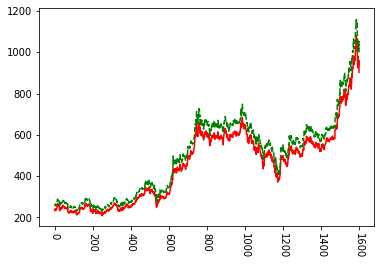

In [11]:
import matplotlib.pyplot as plt
x = [i for i in range(len(list(tests)))]
plt.xticks(rotation=-90)
y = [i * 1000 for i in target_list]
plt.plot(x, y, 'r-', x, list([i*1000 for i in tests]), 'g--') 
plt.show()

In [74]:
model_path = r"C:\Users\Edwar\OneDrive\文件\StockModel\stock_model\weights"
imported = tf.saved_model.load(model_path)

data = tf.constant([clear_list[-1]], dtype=tf.float32)

imported

<tf.Variable 'Variable:0' shape=(5,) dtype=float32, numpy=
array([0.6219723 , 0.00743872, 0.2577155 , 0.20577122, 0.73647124],
      dtype=float32)>

In [42]:



load_model(tf.constant(3.)).numpy()

TypeError: 'UninitializedVariable' object is not callable

In [40]:
#                 reload_sm_result_batch = reload_sm(image_batch, training=False).numpy()
                # 比較原始模型輸出，以及讀取模型輸出值差異，理論上應印出 0.0
#                 print((abs(result_batch - reload_sm_result_batch)).max())
data

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.918     , 0.928     , 0.903     , 0.903     , 0.00343377]],
      dtype=float32)>

In [87]:
restore_dir = r"C:\Users\Edwar\OneDrive\文件\StockModel\stock_model\weights"
tf.saved_model.load(restore_dir)

<tf.Variable 'Variable:0' shape=(5,) dtype=float32, numpy=
array([0.6219723 , 0.00743872, 0.2577155 , 0.20577122, 0.73647124],
      dtype=float32)>